In [20]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [21]:
num_paths = []
num_overlaps = []
with open("segment-10000.csv", newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    for row in reader:
        try:
            num_paths.append(int(row[5]))
            num_overlaps.append(int(row[6]))
        except ValueError:
            continue

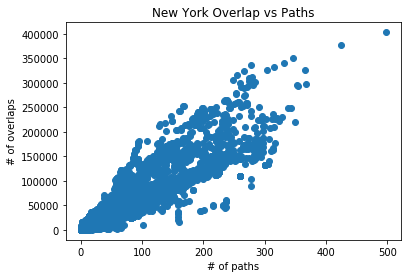

In [22]:
plt.title("New York Overlap vs Paths")
plt.scatter(num_paths, num_overlaps)
plt.ylabel("# of overlaps")
plt.xlabel("# of paths")
plt.show()

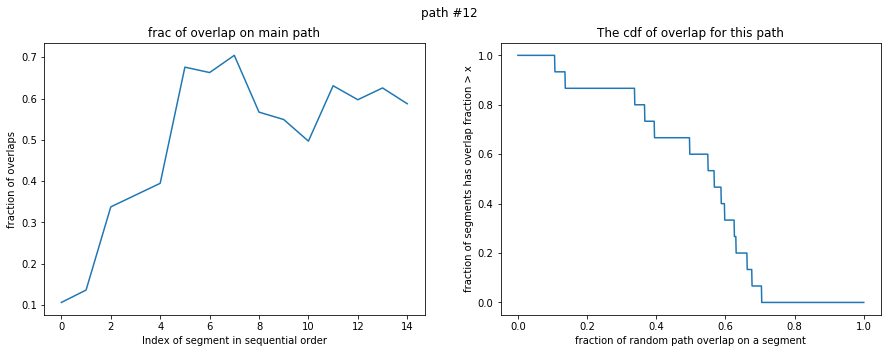

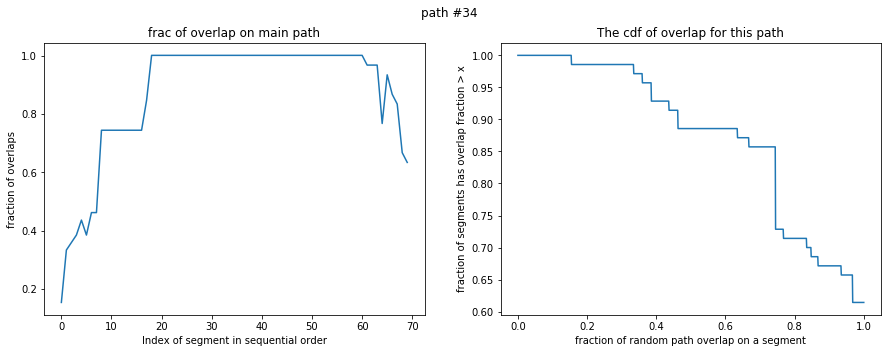

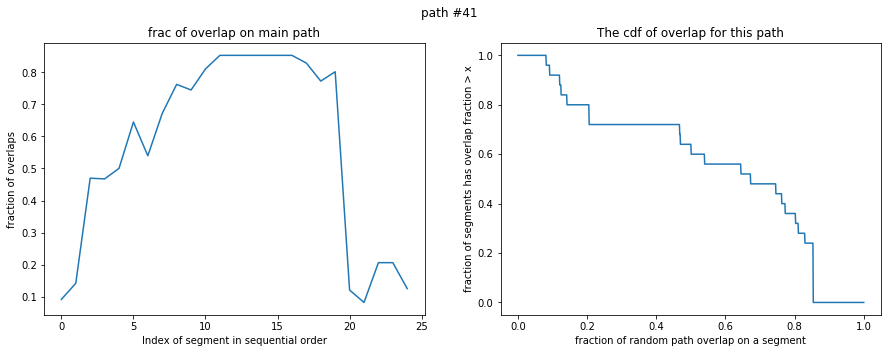

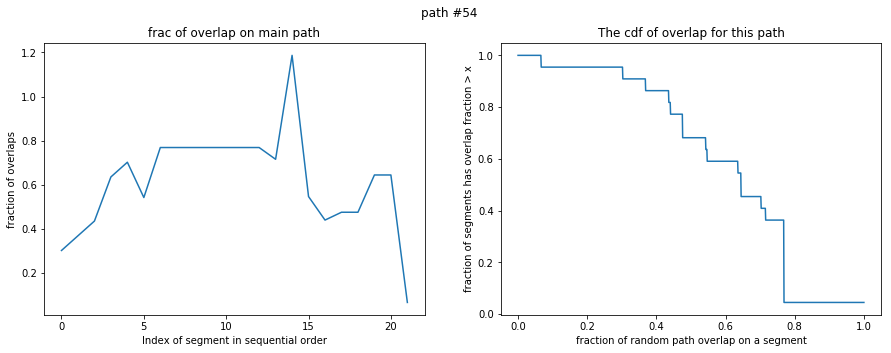

In [34]:
granularity = 0.001
paths = [12, 34, 41, 54]
with open("path.csv", "r") as f:
    lines = f.readlines()
    for line_num in paths:
        plt.figure(figsize=(15, 5))
        plt.suptitle("path #" + str(line_num))
        elements = lines[line_num].split(",")
        path_count = int(elements[0])
        seg_count = int(elements[1])
        seg_overlap = []
        for i in range(1, seg_count + 1):
            seg_overlap.append(int(elements[i * 2 + 1]) / path_count)
        plt.subplot(121)
        plt.title("frac of overlap on main path")
        plt.plot(seg_overlap)
        plt.xlabel("Index of segment in sequential order")
        plt.ylabel("fraction of overlaps")
        
        index = 0
        sorted_seg_overlap = sorted(seg_overlap)
        cdf = []
        rg = range(0, int(1 / granularity) + 1)
        for bound in rg:
            while index < len(sorted_seg_overlap) and sorted_seg_overlap[index] < bound * granularity:
                index += 1
            cdf.append((len(sorted_seg_overlap) - index) / seg_count)
        
        plt.subplot(122)
        plt.title("The cdf of overlap for this path")
        plt.plot([x * granularity for x in rg], cdf)
        plt.xlabel("fraction of random path overlap on a segment")
        plt.ylabel("fraction of segments has overlap fraction > x")
        plt.show()